Produced by: Eleonore Fournier-Tombs, CDH, OCHA
Date: March 18, 2020

# Analysis of coronavirus vulnerability of populations in OCHA countries
The following document examines the vulnerability of the populations in countries in which OCHA has a presence. We use as a baseline China, the United States and a global average.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [135]:
countries = ['Malawi', 'Bangladesh', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Democratic Republic of the Congo',
             'Mali', 'Niger', 'Nigeria', 'Syria', 'Iraq' 'Libya', 'Occupied Palestinian Territory', 'Yemen',
             'Afghanistan', 'Myanmar', 'Pakistan', 'Philippines', 'Burundi','Eritrea', 'Ethiopia', 'Somalia',
             'South Sudan', 'Sudan','Colombia', 'Haiti', 'Venezuela', 'Eastern Europe', 'Ukraine']
            

baselines = ['China', 'United States', 'Italy']

def get_latest_year(df, country):
    country_row = df.loc[df['Country Name'] == country]
    for y in ['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009']:
        try:
            if country_row[y].values[0].astype(str)!='nan':
                return y
        except IndexError as e:
            pass
    return '2009'

def get_data(csv_path):
    data = pd.read_csv(csv_path, skiprows=4)
    data_current = pd.DataFrame(columns=['Country Name', 'Country Code', 'latest_value'])
    for c in countries+baselines:
        year = get_latest_year(data, c)
        current_c = data[data['Country Name']==c][['Country Name', 'Country Code', year]]
        current_c.columns = ['Country Name', 'Country Code', 'latest_value']
        data_current = data_current.append(current_c)
    global_vals = []
    for c in data['Country Name'].unique():
        year = get_latest_year(data, c)
        val = data.loc[data['Country Name']==c][year].values[0].astype(str)
        if val != 'nan':
            global_vals = global_vals+[data.loc[data['Country Name']==c][year].tolist()[0]]
    global_baseline = sum(global_vals)/len(global_vals)
    data_current = data_current.append(pd.DataFrame({'Country Name': 'Global', 'Country Code': 'Global', 'latest_value': global_baseline}, index=[0]))
    return data_current 

In [136]:
#get_data('data/API_SH.MED.PHYS.ZS_DS2_en_csv_v2_868622.csv')

## Indicators of individual vulnerability
We examine specific indicators of individual vulnerability to the coronavirus. The indicators used are:
* "Incidence of HIV (per 1,000 uninfected population ages 15-49) in OCHA countries"
* "Population ages 65 and above (% of total population)"
* People with basic handwashing facilities including soap and water (% of population)


## Indicators of health system capacity
The health system capacity indicators used are:
* Nurses and midwives (per 1,000 people)
* Physicians (per 1,000 people)
* Hospital beds (per 1,000 people) in OCHA countries


The data used for each country corresponds to latest year available between 2009 and 2019. The global average baseline is calculated using the same method.

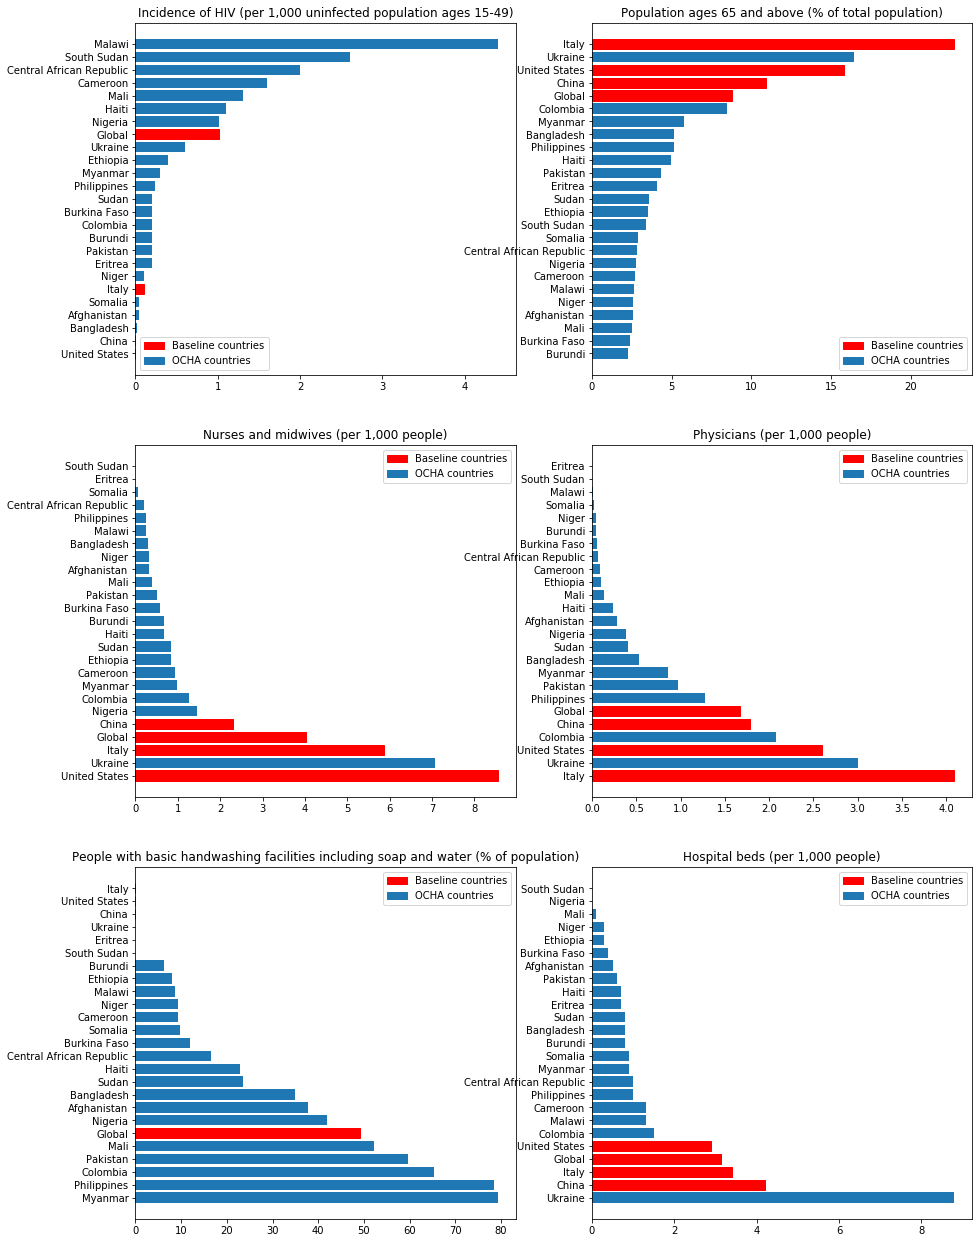

In [138]:
# Vulnerability of population
# AIDS and Tuberculosis rates

red_patch = mpatches.Patch(color='red', label='Baseline countries')
blue_patch = mpatches.Patch(color='C0', label='OCHA countries')

fig = plt.figure(figsize=[15,22])
plt.subplot(3, 2, 1)
aids = get_data('data/API_SH.HIV.INCD.ZS_DS2_en_csv_v2_869331.csv')
aids_sorted = aids.fillna(0).sort_values('latest_value').reset_index()
b_indices = aids_sorted.index[aids_sorted['Country Name'].isin(baselines+['Global'])==True].tolist()
aids_plt = plt.barh(aids_sorted['Country Name'], aids_sorted['latest_value'])
plt.yticks(aids_sorted['Country Name'])
for i in b_indices:
    aids_plt[i].set_color('r')
plt.title("Incidence of HIV (per 1,000 uninfected population ages 15-49)")
plt.legend(handles=[red_patch, blue_patch])

plt.subplot(3, 2, 2)
pop = get_data('data/API_SP.POP.65UP.TO.ZS_DS2_en_csv_v2_867165.csv')
pop_sorted = pop.fillna(0).sort_values('latest_value').reset_index()
b_indices = pop_sorted.index[pop_sorted['Country Name'].isin(baselines+['Global'])==True].tolist()
pop_plt = plt.barh(pop_sorted['Country Name'], pop_sorted['latest_value'])
plt.yticks(pop_sorted['Country Name'])
for i in b_indices:
    pop_plt[i].set_color('r')
plt.title("Population ages 65 and above (% of total population)")
plt.legend(handles=[red_patch, blue_patch])

plt.subplot(3, 2, 3)
mid = get_data('data/API_SH.MED.NUMW.P3_DS2_en_csv_v2_875241.csv')
mid_sorted = mid.fillna(0).sort_values('latest_value', ascending=False).reset_index()
b_indices = mid_sorted.index[mid_sorted['Country Name'].isin(baselines+['Global'])==True].tolist()
mid_plt = plt.barh(mid_sorted['Country Name'], mid_sorted['latest_value'])
plt.yticks(mid_sorted['Country Name'])
for i in b_indices:
    mid_plt[i].set_color('r')
plt.title("Nurses and midwives (per 1,000 people)")
plt.legend(handles=[red_patch, blue_patch])

# Existing infrastructure
plt.subplot(3, 2, 4)
dr = get_data('data/API_SH.MED.PHYS.ZS_DS2_en_csv_v2_868622.csv')
dr_sorted = dr.fillna(0).sort_values('latest_value', ascending=False).reset_index()
b_indices = dr_sorted.index[dr_sorted['Country Name'].isin(baselines+['Global'])==True].tolist()
dr_plt = plt.barh(dr_sorted['Country Name'], dr_sorted['latest_value'])
plt.yticks(dr_sorted['Country Name'])
for i in b_indices:
    dr_plt[i].set_color('r')
plt.title("Physicians (per 1,000 people)")
plt.legend(handles=[red_patch, blue_patch])


plt.subplot(3, 2, 5)
hygn = get_data('data/API_SH.STA.HYGN.ZS_DS2_en_csv_v2_867977.csv')
hygn_sorted = hygn.fillna(0).sort_values('latest_value', ascending=False).reset_index()
b_indices = hygn_sorted.index[hygn_sorted['Country Name'].isin(baselines+['Global'])==True].tolist()
hygn_plt = plt.barh(hygn_sorted['Country Name'], hygn_sorted['latest_value'])
plt.yticks(hygn_sorted['Country Name'])
for i in b_indices:
    hygn_plt[i].set_color('r')
plt.title("People with basic handwashing facilities including soap and water (% of population)")
plt.legend(handles=[red_patch, blue_patch])


plt.subplot(3, 2, 6)
beds = get_data('data/API_SH.MED.BEDS.ZS_DS2_en_csv_v2_867087.csv')
beds_sorted = beds.fillna(0).sort_values('latest_value', ascending=False).reset_index()
b_indices = beds_sorted.index[beds_sorted['Country Name'].isin(baselines+['Global'])==True].tolist()
beds_plt = plt.barh(beds_sorted['Country Name'], beds_sorted['latest_value'])
plt.yticks(beds_sorted['Country Name'])
for i in b_indices:
    beds_plt[i].set_color('r')
plt.title("Hospital beds (per 1,000 people)")
plt.legend(handles=[red_patch, blue_patch])

plt.show()

## Exponential growth of the virus
Below, we plot the growth of cases confirmed by the World Health Organization.

In [133]:
coronavirus = pd.read_csv('data/time_series_2019-ncov-Confirmed.csv')
coronavirus.columns

recent_dates = ['3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20']

older_dates = ['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20','2/25/20', 
               '2/26/20', '2/27/20', '2/28/20', '2/29/20']

def get_timeseries(country, data):
    country_data = data.loc[data['Country/Region'] == country]
    row = country_data.drop(['Country/Region','Province/State', 'Lat', 'Long']+older_dates, axis=1)
    timeseries = row.transpose()
    timeseries.columns = ['confirmed']
    return timeseries

Text(0.5, 1.0, 'Confirmed cases of coronavirus per OCHA country')

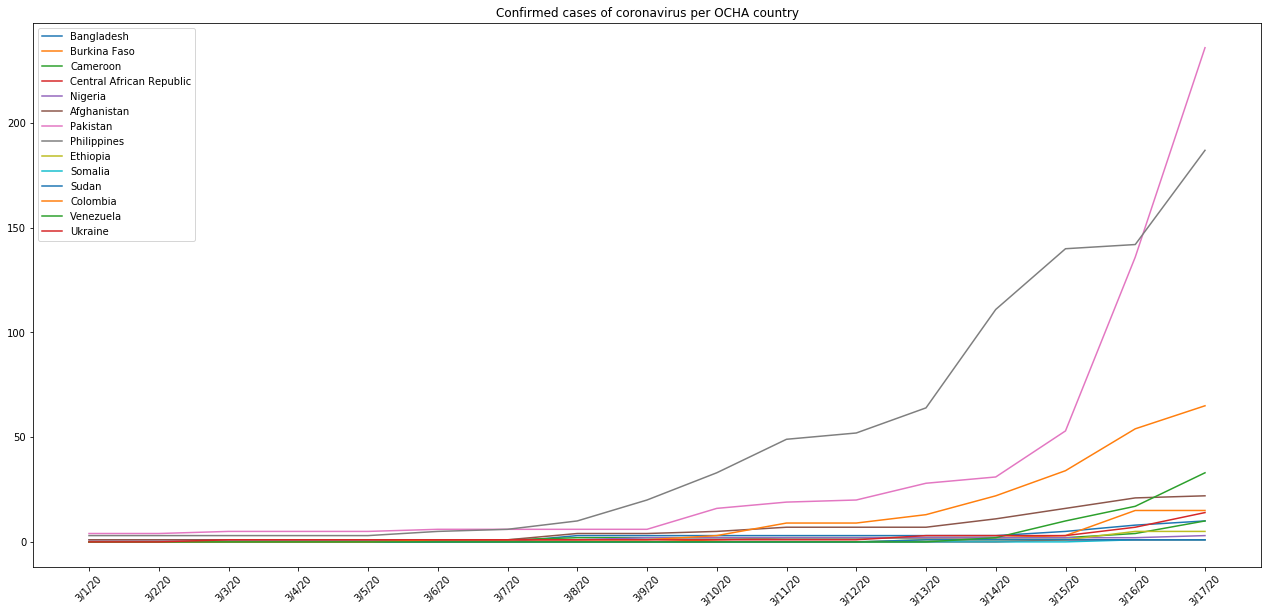

In [134]:
#afg = get_timeseries('Afghanistan', coronavirus)
fig = plt.figure(figsize=[22,10])
for country in countries:
    if country in coronavirus['Country/Region'].tolist():
        c = get_timeseries(country, coronavirus)
        plt.plot(c, label=country)
plt.xticks(rotation=45)
plt.legend()
plt.title("Confirmed cases of coronavirus per OCHA country")

## Next steps
- government measures (as policy advice)
- additional indicators of vulnerability and capacity

In [162]:
countries+baselines

['Malawi',
 'Bangladesh',
 'Burkina Faso',
 'Cameroon',
 'Central African Republic',
 'Democratic Republic of the Congo',
 'Mali',
 'Niger',
 'Nigeria',
 'Syria',
 'IraqLibya',
 'Occupied Palestinian Territory',
 'Yemen',
 'Afghanistan',
 'Myanmar',
 'Pakistan',
 'Philippines',
 'Burundi',
 'Eritrea',
 'Ethiopia',
 'Somalia',
 'South Sudan',
 'Sudan',
 'Colombia',
 'Haiti',
 'Venezuela',
 'Eastern Europe',
 'Ukraine',
 'China',
 'United States']

In [130]:
print(coronavirus.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20'],
      dtype='object')
